## Preparing the Dataset
___
### import modules

In [165]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
from collections import Counter

### prepare data

In [166]:
iris = datasets.load_iris()
iris_data = iris.data
iris_labels = iris.target
print(iris_data.shape)
print(iris_labels.shape)
print(iris_labels)

(150, 4)
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### split data randomly

In [167]:
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_labels, test_size = 0.95, random_state = 1234)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7, 4) (143, 4) (7,) (143,)


### calculate neighbors
input arguments must be numpy array

In [168]:
def distance(data1, data2):
    return np.linalg.norm(data1 - data2)

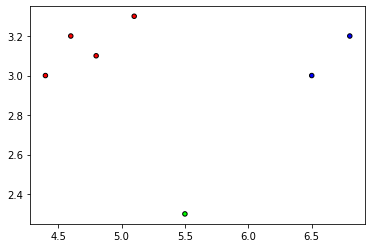

In [169]:
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap, edgecolor='k', s=20)
plt.show()

### KNN model

In [170]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

##input all samples X, for each sample make prediction
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

##for each sample, make prediction
    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]  
        # return the one most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        #return most common 0th dict, 0th variable(key)
        return most_common[0][0] 

### accuracy function

In [171]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

### Training

In [172]:
k = 3
clf = KNN(k=k)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("custom KNN classification accuracy", accuracy(y_test, y_pred))

custom KNN classification accuracy 0.7062937062937062


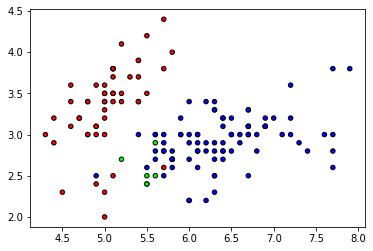

In [173]:
plt.figure()
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap=cmap, edgecolor='k', s=20)
plt.show()

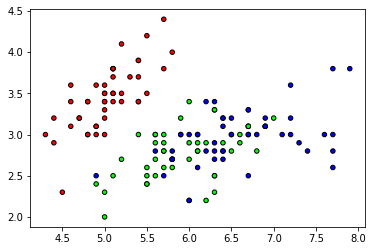

In [174]:
plt.figure()
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=cmap, edgecolor='k', s=20)
plt.show()

(42, 4)
[[6.1 3.  4.6 1.4]
 [6.1 2.9 4.7 1.4]
 [5.7 2.8 4.1 1.3]
 [5.9 3.  4.2 1.5]
 [5.7 2.6 3.5 1. ]
 [5.6 2.7 4.2 1.3]
 [6.4 2.9 4.3 1.3]
 [6.5 2.8 4.6 1.5]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [5.8 2.6 4.  1.2]
 [5.1 2.5 3.  1.1]
 [6.7 3.  5.  1.7]
 [5.  2.3 3.3 1. ]
 [6.2 2.2 4.5 1.5]
 [6.2 2.9 4.3 1.3]
 [4.9 2.4 3.3 1. ]
 [5.6 3.  4.5 1.5]
 [6.9 3.1 4.9 1.5]
 [6.6 2.9 4.6 1.3]
 [6.  2.2 4.  1. ]
 [5.7 2.8 4.5 1.3]
 [6.  2.9 4.5 1.5]
 [5.6 3.  4.1 1.3]
 [5.8 2.7 4.1 1. ]
 [6.  3.4 4.5 1.6]
 [6.  2.7 5.1 1.6]
 [5.5 2.6 4.4 1.2]
 [6.7 3.1 4.7 1.5]
 [5.9 3.2 4.8 1.8]
 [6.3 3.3 4.7 1.6]
 [6.3 2.5 4.9 1.5]
 [5.4 3.  4.5 1.5]
 [5.7 3.  4.2 1.2]
 [5.7 2.9 4.2 1.3]
 [6.3 2.3 4.4 1.3]
 [5.  2.  3.5 1. ]
 [6.1 2.8 4.  1.3]
 [6.7 3.1 4.4 1.4]
 [6.6 3.  4.4 1.4]
 [6.8 2.8 4.8 1.4]
 [7.  3.2 4.7 1.4]]


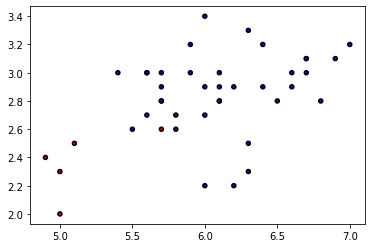

In [175]:
x_error = [[]]
y_test_bias = []
y_pred_bias = []
x_error = [x_test[i,:] for i in range(len(y_pred)) if y_pred[i]!=y_test[i] ]
y_test_bias = [y_test[i] for i in range(len(y_pred)) if y_pred[i]!=y_test[i] ]
y_pred_bias= [y_pred[i] for i in range(len(y_pred)) if y_pred[i]!=y_test[i] ]

x_error = np.array(x_error)

print(x_error.shape)

print(x_error)

plt.figure()
plt.scatter(x_error[:, 0], x_error[:, 1], c=y_test_bias, cmap=cmap, edgecolor='k', s=20)
plt.scatter(x_error[:, 0], x_error[:, 1], c=y_pred_bias, cmap=cmap, edgecolor='k', s=10)
plt.show()